In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

<AxesSubplot:xlabel='X', ylabel='Y'>

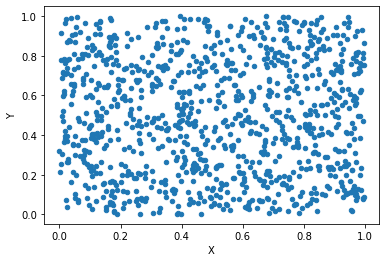

In [2]:
X=np.random.uniform(0,1,1000)
Y=np.random.uniform(0,1,1000)
df_xy=pd.DataFrame(columns=["X","Y"])
df_xy.X=X
df_xy.Y=Y
df_xy.plot(x="X",y="Y",kind="scatter")

In [9]:
X=np.random.uniform(0,1,100)
X

array([0.21610248, 0.24829481, 0.81708985, 0.33415335, 0.2839715 ,
       0.17352391, 0.05773137, 0.80179774, 0.05914203, 0.05845752,
       0.37280542, 0.73236895, 0.26606075, 0.96644493, 0.60445787,
       0.19938004, 0.23432768, 0.27317738, 0.37686976, 0.80581912,
       0.98248051, 0.66225859, 0.8686552 , 0.82706094, 0.18096118,
       0.62125012, 0.89350676, 0.56159122, 0.24833829, 0.05883315,
       0.97604457, 0.71513606, 0.72819188, 0.15720325, 0.41342229,
       0.69970055, 0.92963534, 0.87721931, 0.97488255, 0.42144949,
       0.02556966, 0.54042449, 0.74897881, 0.95262235, 0.1813701 ,
       0.26655817, 0.00711136, 0.65848595, 0.25708614, 0.68157182,
       0.06968955, 0.70740317, 0.01065513, 0.09369575, 0.01821788,
       0.96469465, 0.836163  , 0.5885271 , 0.88935843, 0.2342699 ,
       0.05623538, 0.31594007, 0.75468993, 0.9193618 , 0.55570056,
       0.01226747, 0.49198831, 0.26989612, 0.48439363, 0.47864371,
       0.55259217, 0.65748971, 0.26438981, 0.05275157, 0.18390

<AxesSubplot:xlabel='X', ylabel='Y'>

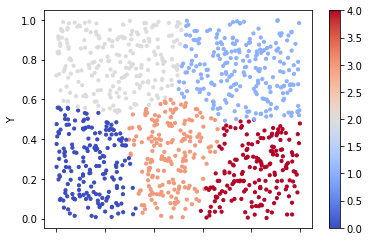

In [13]:
model1=KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X",y="Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [15]:
univ=pd.read_csv("univ.csv")

In [19]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [21]:
df_norm=norm_func(univ.iloc[:,1:])
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [22]:
model=KMeans(n_clusters=5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [23]:
model.labels_

array([0, 3, 1, 0, 0, 4, 4, 0, 4, 3, 4, 0, 0, 2, 4, 2, 4, 2, 1, 0, 1, 0,
       0, 2, 4])

In [24]:
md=pd.Series(model.labels_)
univ['clust']=md

In [26]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [28]:
univ.iloc[:,1:7].groupby(univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
1,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
2,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
